In [92]:
import pandas as pd
import emoji
import string
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
import re
plt.style.use('fivethirtyeight')

In [83]:
df = pd.read_csv('covidData.csv')
df.head()

,Unnamed: 0,tweet_id_str,date_time,location,tweet_text
0,0,1539759672227467264,2022-06-22 23:58:07,"Topeka, KS",In case you missed it: @CDCgov now recommends ...
1,1,1539759592326008833,2022-06-22 23:57:48,USA,Florida-based grocery chain and pharmacy retai...
2,2,1539759126586195970,2022-06-22 23:55:57,"Minneapolis, MN",Thank you @austindenean Misinformation about C...
3,3,1539758982117478400,2022-06-22 23:55:23,"Carlsbad, CA",How much damage was done to childhood vaccine ...
4,4,1539758154241777665,2022-06-22 23:52:05,USA,Responsible\n\nPublix won’t give COVID vaccine...


In [84]:
def extract_emojis(s):
    return ''.join(c for c in s if c in emoji.UNICODE_EMOJI['en'])

In [85]:
df['emojis'] = df['tweet_text'].apply(extract_emojis)

tweets_with_emojis = df[df['emojis'].apply(len) > 0]

print("% of tweets with emojis", tweets_with_emojis.shape[0] / df.shape[0] * 100)

% of tweets with emojis 7.3


In [86]:
all_emojis = ' '.join( [data for data in tweets_with_emojis['emojis']])
all_emojis

'😢 💉 💐⬇ 🎥 🎥 👍👍👍 ➡ 💪 ⬇ ‼ 😷😷 🤨 📣 ⬇⬇ 💰 📅❓ 🧵 🟨💉🏥😷 ➡ 🥳🤷♀ 👇 😷✅✅✅❌ 😷✅✅✅❌ 🙌😭💃🕺🏻😭🙌 👇🏾💉 😳😳😳 🚨 ➡ 🎧 👇🏻 📢 📢 🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉 🤔 ➡ 💉 ‼ 👇👇 💉 🩺👩⚕➡ 😱😨😰 💉 🔥👇😢💔 😁😭🙏🎉 🤡🌍 ✔ 🙌👏👏 💓💓💓💓💓💓 🚌🌈🏳🌈✔💉🙂 💉💉💉 🤢 ➡ 📍 😑 ⭐ ⤵ ⬇ 🦄 ☎🗓⏰ 🎉🎊❤ 💉 📣📣📣 ❤🌍 💙💉 😎☀ 🦠 📣 📢 🎉➡ ➡ 😭😭 💉 ☝😐'

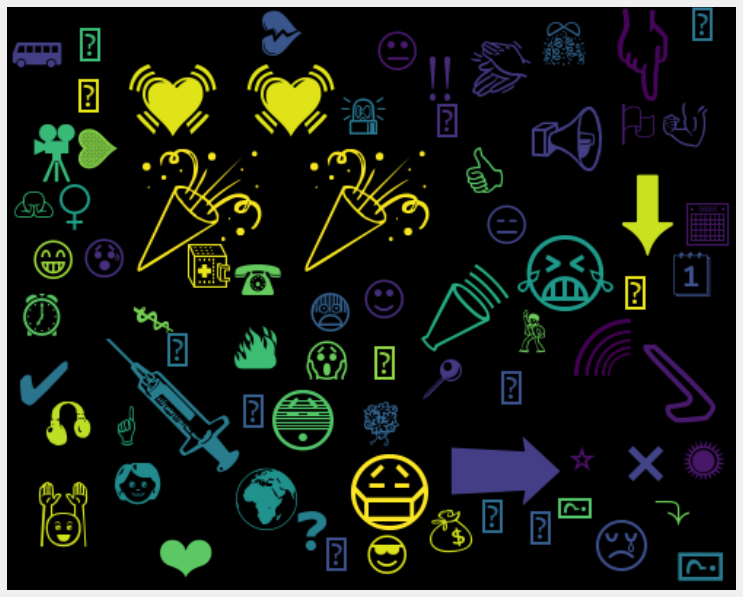

In [87]:
normal_word = r"(?:\w[\w']+)"
# 2+ consecutive punctuations, e.x. :)
ascii_art = r"(?:[{punctuation}][{punctuation}]+)".format(punctuation=string.punctuation)
# a single character that is not alpha_numeric or other ascii printable
emoji = r"(?:[^\s])(?<![\w{ascii_printable}])".format(ascii_printable=string.printable)
regexp = r"{normal_word}|{ascii_art}|{emoji}".format(normal_word=normal_word, ascii_art=ascii_art,
                                                     emoji=emoji)
word_cloud = WordCloud(width=500, height=400, random_state=21, max_font_size = 100,font_path="Symbola.ttf", regexp=regexp).generate(all_emojis)
plt.figure(figsize = (20,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [88]:
df['tweet_length'] = df['tweet_text'].apply(len)
df.head()

,Unnamed: 0,tweet_id_str,date_time,location,tweet_text,emojis,tweet_length
0,0,1539759672227467264,2022-06-22 23:58:07,"Topeka, KS",In case you missed it: @CDCgov now recommends ...,,227
1,1,1539759592326008833,2022-06-22 23:57:48,USA,Florida-based grocery chain and pharmacy retai...,,265
2,2,1539759126586195970,2022-06-22 23:55:57,"Minneapolis, MN",Thank you @austindenean Misinformation about C...,,283
3,3,1539758982117478400,2022-06-22 23:55:23,"Carlsbad, CA",How much damage was done to childhood vaccine ...,😢,232
4,4,1539758154241777665,2022-06-22 23:52:05,USA,Responsible\n\nPublix won’t give COVID vaccine...,,88


In [93]:
df["tweet_length"].mean()

189.195

Text(0.5, 0, 'Tweet Length')

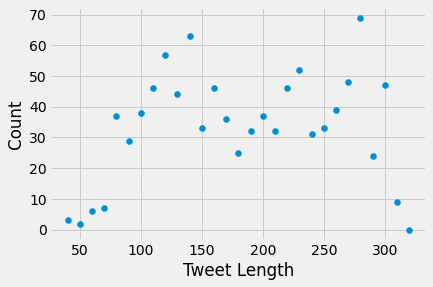

In [89]:
tweet_length_dict = {}
round_no = 10

for tweet in df['tweet_text']:
    length = round(len(tweet)/round_no)*round_no
    
    if length in tweet_length_dict:
        tweet_length_dict[length] +=1
    else:
        tweet_length_dict[length] =0
        
plt.scatter(tweet_length_dict.keys(),tweet_length_dict.values())
plt.ylabel('Count')
plt.xlabel('Tweet Length')

% of tweets with capital words 88.3


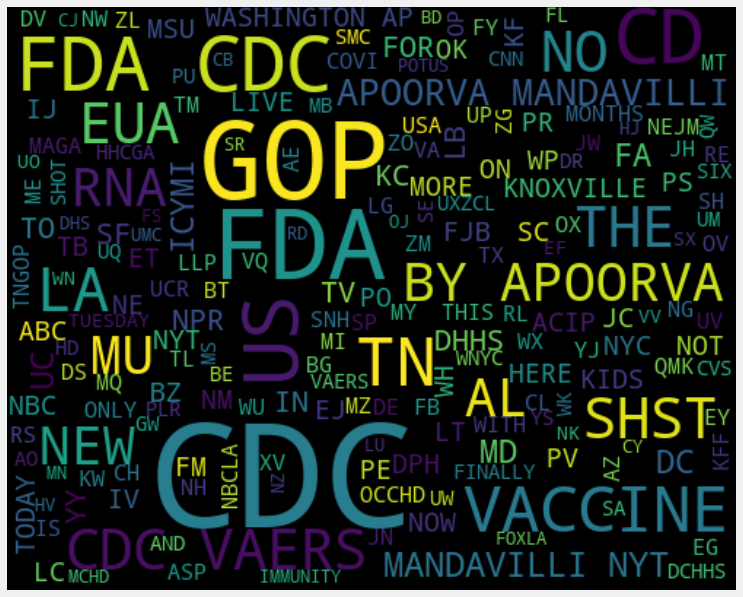

In [91]:
def get_uppercase_words(text):
    return re.findall('([A-Z]+(?:(?!\s?[A-Z][a-z])\s?[A-Z])+)', text)

def join_arr(arr):
    return " ".join(arr)

df['uppercase_words'] = df['tweet_text'].apply(get_uppercase_words)

tweets_with_uppercase_words_df = df[df['uppercase_words'].apply(len) > 0]
print("% of tweets with capital words", tweets_with_uppercase_words_df.shape[0] / df.shape[0] * 100)

all_words = [data for data in tweets_with_uppercase_words_df['uppercase_words'].apply(join_arr)]
all_words = " ".join(all_words).replace("COVID","")
word_cloud = WordCloud(width=500, height=400, random_state=21, max_font_size = 100).generate(all_words)

plt.figure(figsize = (20,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()